<a href="https://colab.research.google.com/github/SergioaA64/MachineLearning2022/blob/main/EnapML__rodando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#USO DE MACHINE LEARNING PARA PREDIÇÃO DO PREÇO OBTIDO EM LICITAÇÕES DA MODALIDADE PREGÃO

Na modalidade de licitação conhecida como Pregão, o conhecimento do "preço de mercado"do produto que está sendo adquirido pode ser grande ajuda àqueles responsáveis pela aceitação, homologação ou controle dos processos de aquisição. Ao Pregoeiro, com relação ao preço obtido ao final do certame, cabe "decidir motivadamente a respeito da sua aceitabilidade", conforme expresso na Lei que regulamenta o assunto. 

Acontece que esse juízo de aceitabilidade nem sempre é fácil ou sem sobressaltos, pois os produtos licitados sempre podem sofrer com flutuações de mercado, sazonalidades e práticas comerciais que distorcem os preços e dificultam o seu julgamento. Muitas vezes o critério utilizado para balizar o julgamento é a média de preços praticados recentemente, o que pode ocasionar, pela simplicidade do método, vários problemas como licitações indevidamente fracassadas, sobrepreço e preços inexequíveis.

Como esse problema pode se provar muito complexo, uma vez que cada produto possui mercados diferentes, com características peculiares, foi necessário reduzir o escopo do projeto para um produto que representasse a viabilidade do uso de soluções de Machine Learning em problemas desta natureza.

Segue abaixo uma singela, mas eficiente, descrição de como o projeto proposto pretende ajudar a pensar soluções para este problema:



1.   **Descrição do problema:** Simplicidade das formas utilizadas para embasar o juízo de aceitabilidade dos preços,
2.   **Descrição da solução de IA:** Criação de um modelo de regressão que possa fazer uma predição dos preços a serem obtidos ao término do certame, auxiliando aos atores envolvidos (Pregoeiros, Autoridades Superiores e Auditores) na emissão de juízo de valor acerca da aceitabilidade do preço obtido,
3.  **Fonte de Dados:** principalmente a base de dados do sistema SIASG, extraído através do schema DWSIASG do banco da CGU. Os dados extraídos esão disponíveis no endereço: "https://raw.githubusercontent.com/lourencolimadf/ENAPD12/main/CAFE_SIASG_COMPLETO.CSV". Também foi importada uma base disponibilizada pelo CEPEA/ESALQ/USP (https://www.cepea.esalq.usp.br/br/consultas-ao-banco-de-dados-do-site.aspx) com a cotação dos preços de comercialização das sacas de café. O arquivo transformado pode ser consultado em https://raw.githubusercontent.com/mateusmagon/datsets/main/cotacao_cafe2.csv.
4.  **Variáveis independentes:**'UltLanMes', 'UltLanAno', 'UnidPoder', 'UniEsfera', 'UnidUF','ValorEstimadoUnitReal', que representam o mês e o ano em que ocorreu o certame, o poder, a esfera e a UF a que pertencem a unidade que promoveu a licitação e o valor estimado feito pelo próprio órgão para aquela licitação em específico.
5. **Variável Dependente:** 'ValorReal', criada a partir da variável 'VlUnitHom', para adequação das unidades de medida. Expressa o valor obtido em cada licitação.  










In [ ]:
#importando as bibliotecas que serão utilizadas, exceto a lazypredict que necessitará ser instalada no ambiente, e será importada quando necessário
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore')


##Importação dos Datasets


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/lourencolimadf/ENAPD12/main/CAFE_SIASG_COMPLETO.CSV",
                 encoding='latin1',sep='|',decimal=',',error_bad_lines=False)
pd.set_option('display.max_columns', 500)
df.head()

b'Skipping line 3502: expected 62 fields, saw 67\nSkipping line 6711: expected 62 fields, saw 63\n'


,ID_ITCP_ITEM_COMPRA01,licitacao,IdItemCompra,DsItemCompra,DsItemCompraComp,Cmp_Gru,I_Cmp,I_Und,DS_ITCP_MODELO_VERSAO,Sustent,CritVal,Vl_Sigilo,Tp_Reduc,IdCompra,ObjCompra,DtResultCompra,ModLicita,CoDMS,UnidCod,UnidNome,UnidUF,UnidREGIAO,OrgCod,OrgNome,OrgSupCod,OrgSupNome,FornCPFCnpj,FornNome,FornMun,FornUF,FornVenceu,DtUltLance,UltLanMes,UltLanAno,ResCmpMes,ResCmpAno,QtdOferta,VlUltLance,QtOfXVlUltLance,VlTotHom,VlUnitHom,UnidPoder,UniEsfera,ID_ITCP_ITEM_COMPRA,ID_ITCP_PLACA_INDICADORES,ID_ITCP_TP_COD_MAT_SERV,ID_CMPR_COMPRA,ID_ITCP_SIT_ATUAL_ITEM,QT_ITCP_ITEM_COMPRAS,QT_ITCP_SOLICITADA,QT_ITCP_LANCES_ITEM,VL_ITCP_MENOR_PROPOSTA_COMPRA,VL_ITCP_PROPOSTA_VENC_COMPRA,VL_ITCP_MENOR_PRECO_ITEM_SRP,VL_ITCP_MAIOR_PRECO_ITEM_SRP,VL_ITCP_PRECO_UNIT_ESTIM,VL_ITCP_PRECO_GLOBAL_ESTIM,DT_INCLUSAO,DT_ALTERACAO,VL_ITCP_MONET_DIF_LANCE,PE_ITCP_DIF_LANCE,UNID_KG_REAL
0,12222456,00037/2020,100010500037202000001,CAFÉ,"CAFÉ, APRESENTAÇÃO TORRADO MOÍDO, INTENSIDADE ...",Não tem Grupo,CAFÉ,"PACOTE 1,00 KG",Vácuo,NÃO INFORMADO,Valor Estimado,Sim,Percentual,1000105000372020,Objeto: Pregão Eletrônico - Fornecimento de c...,07/04/2020,Pregão,1000463574,10001,CAMARA DOS DEPUTADOS,DF,CO,1000,CAMARA DOS DEPUTADOS,1000,CAMARA DOS DEPUTADOS,33174960000127,DMS COMERCIO E DISTRIBUICAO DE CAFE LTDA,CONTAGEM,MG,S,25/03/2020,3.0,2020.0,4.0,2020,67000,633000.0,4.241100e+10,632480.0,9.44,Legislativo,Federal,12222456,29294,1.000464e+09,835518.0,1.0,1.0,67000.0,56.0,"636500,0000",15.0,0.0,0.0,22.12,1482040.0,2022-04-10 00:00:00.0000000,NaN,0.0,0.1,1.00
1,12706518,00046/2021,100010500046202100001,CAFÉ,"CAFÉ, APRESENTAÇÃO TORRADO MOÍDO, INTENSIDADE ...",Não tem Grupo,CAFÉ,"PACOTE 1,00 KG",vacuo,NÃO INFORMADO,Valor Estimado,Sim,Percentual,1000105000462021,Objeto: Pregão Eletrônico - Fornecimento de c...,26/07/2021,Pregão,1000463581,10001,CAMARA DOS DEPUTADOS,DF,CO,1000,CAMARA DOS DEPUTADOS,1000,CAMARA DOS DEPUTADOS,354138000350,FINO SABOR INDUSTRIA E COMERCIO LTDA,BRASILIA,DF,S,15/07/2021,7.0,2021.0,7.0,2021,42000,629000.0,2.641800e+10,628740.0,14.97,Legislativo,Federal,12706518,29294,1.000464e+09,887434.0,1.0,1.0,42000.0,72.0,"504000,0000",18.0,0.0,0.0,24.80,1041600.0,2022-04-10 00:00:00.0000000,NaN,0.0,0.5,1.00
2,13008659,00003/2022,400010500003202200001,CAFÉ,"CAFÉ, APRESENTAÇÃO TORRADO MOÍDO, INTENSIDADE ...",Não tem Grupo,CAFÉ,"PACOTE 500,00 G",vacuo,NÃO INFORMADO,Valor Máximo Aceitável,Não,Não se Aplica,4000105000032022,"Objeto: Pregão Eletrônico - Aquisição, com en...",23/03/2022,Pregão,1000463581,40001,STF/SUPREMO TRIBUNAL FEDERAL/DF,DF,CO,10000,SUPREMO TRIBUNAL FEDERAL,10000,SUPREMO TRIBUNAL FEDERAL,354138000350,FINO SABOR INDUSTRIA E COMERCIO LTDA,BRASILIA,DF,S,11/02/2022,2.0,2022.0,3.0,2022,12000,197880.0,2.374560e+09,197880.0,16.49,Judiciário,Federal,13008659,29294,1.000464e+09,920222.0,1.0,1.0,12000.0,61.0,"228000,0000",20.0,0.0,0.0,19.48,233760.0,2022-04-10 00:00:00.0000000,NaN,0.0,0.0,0.50
3,12409041,00046/2020,400010500046202000018,CAFÉ,"CAFÉ, APRESENTAÇÃO TORRADO MOÍDO, INTENSIDADE ...",Grupo 1,CAFÉ,UNIDADE,export,NÃO INFORMADO,Valor Máximo Aceitável,Não,Não se Aplica,4000105000462020,Objeto: Pregão Eletrônico - Fornecimento parc...,22/10/2020,Pregão,1000463585,40001,STF/SUPREMO TRIBUNAL FEDERAL/DF,DF,CO,10000,SUPREMO TRIBUNAL FEDERAL,10000,SUPREMO TRIBUNAL FEDERAL,19600228000140,ARCANJOS COMERCIAL DE ALIMENTOS EIRELI,BRASILIA,DF,S,07/10/2020,10.0,2020.0,10.0,2020,75,2100.0,1.575000e+05,2100.0,28.00,Judiciário,Federal,12409041,29291,1.000464e+09,855873.0,1.0,1.0,75.0,1.0,"2100,0000",28.0,0.0,0.0,28.00,2100.0,2022-04-10 00:00:00.0000000,NaN,0.0,0.0,NaN
4,12839605,00051/2021,700110500051202100001,CAFÉ,"CAFÉ, APRESENTAÇÃO TORRADO MOÍDO, INTENSIDADE ...",Não tem Grupo,CAFÉ,"PACOTE 250,00 G","do tipo superior, de 1 linha",NÃO INFORMADO,Valor Máximo Aceitável,Não,Não se Aplica,7001105000512021,Objeto: Pregão Eletrônico - Aquisição de mate...,17/11/2021,Pregão,1000463587,70011,TRIBUNAL REGIONAL ELEITORAL DE ALAGOAS,AL,NE,14000,JUSTICA ELEITORAL,14000,JUSTICA

In [ ]:
cot_cafe = pd.read_csv('https://raw.githubusercontent.com/mateusmagon/datsets/main/cotacao_cafe2.csv',sep=';',decimal=',',encoding='Latin-1')
cot_cafe.head()

,Data,Mês,Ano,Preco_Reais,Preco_Dolar,Unnamed: 5,Base2011_1_real,BaseMesAnterior
0,jan/11,1,2011,"433,34",258.55,NaN,1.000000,1.000000
1,fev/11,2,2011,"495,98",297.28,NaN,1.144552,1.000000
2,mar/11,3,2011,"524,27",315.91,NaN,1.209835,1.144552
3,abr/11,4,2011,"524,41",330.82,NaN,1.210158,1.209835
4,mai/11,5,2011,"530,76",329.11,NaN,1.224812,1.210158


In [ ]:
df.shape

(7418, 62)

In [ ]:
cot_cafe.shape

(136, 8)

##Análise Exploratória e Transformações

In [ ]:
#checando valores nulos
df.isna().sum()

ID_ITCP_ITEM_COMPRA01         0
licitacao                     0
IdItemCompra                  0
DsItemCompra                  0
DsItemCompraComp              0
                           ... 
DT_INCLUSAO                   1
DT_ALTERACAO               7418
VL_ITCP_MONET_DIF_LANCE       1
PE_ITCP_DIF_LANCE             1
UNID_KG_REAL               1757
Length: 62, dtype: int64

In [ ]:
#checando as correlações de Pearson com a variável target
df.corr()['VlUnitHom']

ID_ITCP_ITEM_COMPRA01           0.001501
UnidCod                        -0.009439
FornCPFCnpj                    -0.012606
UltLanMes                       0.999974
UltLanAno                       0.999942
ResCmpMes                      -0.006583
VlUltLance                      0.999894
QtOfXVlUltLance                -0.000372
VlTotHom                        0.946505
VlUnitHom                       1.000000
ID_ITCP_ITEM_COMPRA            -0.020383
ID_ITCP_PLACA_INDICADORES      -0.070399
ID_ITCP_TP_COD_MAT_SERV        -0.999903
ID_CMPR_COMPRA                 -0.019008
ID_ITCP_SIT_ATUAL_ITEM          0.942808
QT_ITCP_ITEM_COMPRAS            0.999999
QT_ITCP_SOLICITADA             -0.002915
QT_ITCP_LANCES_ITEM             0.996177
VL_ITCP_PROPOSTA_VENC_COMPRA    0.241749
VL_ITCP_MENOR_PRECO_ITEM_SRP    0.000156
VL_ITCP_MAIOR_PRECO_ITEM_SRP    0.000155
VL_ITCP_PRECO_UNIT_ESTIM        0.000412
VL_ITCP_PRECO_GLOBAL_ESTIM     -0.000305
DT_ALTERACAO                         NaN
VL_ITCP_MONET_DI

In [ ]:
#checando uma linha com valor nulo no campo "UNID_KG_REAL" para checar a qualidade dos dados
print(df[df["UNID_KG_REAL"].isna()].iloc[0,-10:-1])

VL_ITCP_PROPOSTA_VENC_COMPRA                           28.0
VL_ITCP_MENOR_PRECO_ITEM_SRP                            0.0
VL_ITCP_MAIOR_PRECO_ITEM_SRP                            0.0
VL_ITCP_PRECO_UNIT_ESTIM                               28.0
VL_ITCP_PRECO_GLOBAL_ESTIM                           2100.0
DT_INCLUSAO                     2022-04-10 00:00:00.0000000
DT_ALTERACAO                                            NaN
VL_ITCP_MONET_DIF_LANCE                                 0.0
PE_ITCP_DIF_LANCE                                       0.0
Name: 3, dtype: object


In [ ]:
df.describe(include='all')

,ID_ITCP_ITEM_COMPRA01,licitacao,IdItemCompra,DsItemCompra,DsItemCompraComp,Cmp_Gru,I_Cmp,I_Und,DS_ITCP_MODELO_VERSAO,Sustent,CritVal,Vl_Sigilo,Tp_Reduc,IdCompra,ObjCompra,DtResultCompra,ModLicita,CoDMS,UnidCod,UnidNome,UnidUF,UnidREGIAO,OrgCod,OrgNome,OrgSupCod,OrgSupNome,FornCPFCnpj,FornNome,FornMun,FornUF,FornVenceu,DtUltLance,UltLanMes,UltLanAno,ResCmpMes,ResCmpAno,QtdOferta,VlUltLance,QtOfXVlUltLance,VlTotHom,VlUnitHom,UnidPoder,UniEsfera,ID_ITCP_ITEM_COMPRA,ID_ITCP_PLACA_INDICADORES,ID_ITCP_TP_COD_MAT_SERV,ID_CMPR_COMPRA,ID_ITCP_SIT_ATUAL_ITEM,QT_ITCP_ITEM_COMPRAS,QT_ITCP_SOLICITADA,QT_ITCP_LANCES_ITEM,VL_ITCP_MENOR_PROPOSTA_COMPRA,VL_ITCP_PROPOSTA_VENC_COMPRA,VL_ITCP_MENOR_PRECO_ITEM_SRP,VL_ITCP_MAIOR_PRECO_ITEM_SRP,VL_ITCP_PRECO_UNIT_ESTIM,VL_ITCP_PRECO_GLOBAL_ESTIM,DT_INCLUSAO,DT_ALTERACAO,VL_ITCP_MONET_DIF_LANCE,PE_ITCP_DIF_LANCE,UNID_KG_REAL
count,7.418000e+03,7418,7418,7418,7418,7418,7418,7418,7408,7418,7418,7418,7418,7418,7418,7418,7418,7418,7418.000000,7418,7418,7418,7418,7418,7418,7418,7.418000e+03,7418,7418,7418,7418,7418,7418.000000,7418.000000,7418.000000,7418,7418,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7418,7418,7.418000e+03,7418.000000,7.418000e+03,7.418000e+03,7418.000000,7418.000000,7418.000000,7418.000000,7418,7417.000000,7418.000000,7418.000000,7418.000000,7.417000e+03,7417,0.0,7417.000000,7417.000000,5661.000000
unique,NaN,1466,7418,2,1242,21,2,237,1590,4,4,4,4,5894,5468,2393,3,63,NaN,2012,28,6,312,312,102,102,NaN,1757,514,29,2,2376,NaN,NaN,NaN,22,1625,NaN,NaN,NaN,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2525,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
top,NaN,00002/2018,100010500037202000001,CAFÉ,"CAFÉ, TIPO TORRADO, APRESENTAÇÃO MOÍDO, TIPO E...",Não tem Grupo,CAFÉ,"PACOTE 500,00 G",NAO SE APLICA,NÃO INFORMADO,Não se Aplica,Não se Aplica,Não se Aplica,45052205000662019,Objeto: Pregão Eletrônico - Aquisição de gêne...,25/09/2019,Pregão,1000009725,NaN,PREFEITURA DO MUNICIPIO DE ARIQUEMES,RJ,SE,52121,COMANDO DO EXERCITO,99900,REPUBLICA FEDERATIVA DO BRASIL,NaN,ODEBRECHT COMERCIO E INDUSTRIA DE CAFE LTDA,BRASILIA,MG,S,29/08/2019,NaN,NaN,NaN,2019,1000,NaN,NaN,NaN,NaN,Executivo,Federal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,0000",NaN,NaN,NaN,NaN,NaN,2022-04-10 00:00:00.0000000,NaN,NaN,NaN,NaN
freq,NaN,99,1,7364,1168,5119,7364,2721,1386,5862,5245,5245,5826,65,80,74,6342,1501,NaN,95,684,1941,638,638,1466,1466,NaN,379,1060,1241,7417,68,NaN,NaN,NaN,1040,249,NaN,NaN,NaN,NaN,6999,5932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,322,NaN,NaN,NaN,NaN,NaN,7417,NaN,NaN,NaN,NaN
mean,2.024315e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359427.545160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.468004e+13,NaN,NaN,NaN,NaN,NaN,12.056349,2021.667565,6.886762,NaN,NaN,3.437990e+04,1.882391e+08,2.173696e+05,2.708138e+04,NaN,NaN,2.024020e+08,23935.304664,1.000128e+09,1.904790e+08,1.000809,1.000539,4773.916083,46.999461,NaN,369.631333,16.873535,16.873534,157.014833,8.379975e+05,NaN,NaN,0.338280,0.067546,0.479818
std,1.154950e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318945.704384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.275425e+13,NaN,NaN,NaN,NaN,NaN,464.360460,441.037828,3.330618,NaN,NaN,2.525514e+06,5.888621e+09,1.227312e+07,2.326218e+06,NaN,NaN,1.155187e+08,3946.858699,1.161482e+07,1.165938e+08,0.049257,0.046443,19032.551145,512.350365,NaN,16989.617977,880.383296,880.383296,5519.502601,4.725955e+07,NaN,NaN,5.119633,0.499922,0.205278
min,6.054000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+00,NaN,NaN,NaN,NaN,NaN,1.000000,2002.000000,1.000000,NaN,NaN,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e-04,NaN,NaN,6.054000e+03,7.000000,4.500000e+00,5.400000e+00,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,0.000000,0.000000,0.250000
25%,2.110071e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154522.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.611027e+12,NaN,NaN,NaN,

In [ ]:
df.columns

Index(['ID_ITCP_ITEM_COMPRA01', 'licitacao', 'IdItemCompra', 'DsItemCompra',
       'DsItemCompraComp', 'Cmp_Gru', 'I_Cmp', 'I_Und',
       'DS_ITCP_MODELO_VERSAO', 'Sustent', 'CritVal', 'Vl_Sigilo', 'Tp_Reduc',
       'IdCompra', 'ObjCompra', 'DtResultCompra', 'ModLicita', 'CoDMS',
       'UnidCod', 'UnidNome', 'UnidUF', 'UnidREGIAO', 'OrgCod', 'OrgNome',
       'OrgSupCod', 'OrgSupNome', 'FornCPFCnpj', 'FornNome', 'FornMun',
       'FornUF', 'FornVenceu', 'DtUltLance', 'UltLanMes', 'UltLanAno',
       'ResCmpMes', 'ResCmpAno', 'QtdOferta', 'VlUltLance', 'QtOfXVlUltLance',
       'VlTotHom', 'VlUnitHom', 'UnidPoder', 'UniEsfera',
       'ID_ITCP_ITEM_COMPRA', 'ID_ITCP_PLACA_INDICADORES',
       'ID_ITCP_TP_COD_MAT_SERV', 'ID_CMPR_COMPRA', 'ID_ITCP_SIT_ATUAL_ITEM',
       'QT_ITCP_ITEM_COMPRAS', 'QT_ITCP_SOLICITADA', 'QT_ITCP_LANCES_ITEM',
       'VL_ITCP_MENOR_PROPOSTA_COMPRA', 'VL_ITCP_PROPOSTA_VENC_COMPRA',
       'VL_ITCP_MENOR_PRECO_ITEM_SRP', 'VL_ITCP_MAIOR_PRECO_ITEM_SRP',
     

In [ ]:
#filtrando o dataset para as variáveis de maior interesse
df = df[['UltLanMes',	'UltLanAno','UnidPoder', 'UniEsfera','UnidUF','QT_ITCP_ITEM_COMPRAS', 'QT_ITCP_SOLICITADA', 'QT_ITCP_LANCES_ITEM',
        'VL_ITCP_PROPOSTA_VENC_COMPRA',
       'VL_ITCP_PRECO_UNIT_ESTIM','UNID_KG_REAL','QtdOferta', 'VlUnitHom' ]]

In [ ]:
df.head()

,UltLanMes,UltLanAno,UnidPoder,UniEsfera,UnidUF,QT_ITCP_ITEM_COMPRAS,QT_ITCP_SOLICITADA,QT_ITCP_LANCES_ITEM,VL_ITCP_PROPOSTA_VENC_COMPRA,VL_ITCP_PRECO_UNIT_ESTIM,UNID_KG_REAL,QtdOferta,VlUnitHom
0,3.0,2020.0,Legislativo,Federal,DF,1.0,67000.0,56.0,15.0,22.12,1.00,67000,9.44
1,7.0,2021.0,Legislativo,Federal,DF,1.0,42000.0,72.0,18.0,24.80,1.00,42000,14.97
2,2.0,2022.0,Judiciário,Federal,DF,1.0,12000.0,61.0,20.0,19.48,0.50,12000,16.49
3,10.0,2020.0,Judiciário,Federal,DF,1.0,75.0,1.0,28.0,28.00,NaN,75,28.00
4,10.0,2021.0,Judiciário,Federal,AL,1.0,2000.0,24.0,10.0,9.24,0.25,2000,7.68


In [ ]:
#eliminando as linhas cuja coluna 'UNID_KG_REAL' seja nula
df2 = df[df['UNID_KG_REAL'].notnull()]

In [ ]:
df2.shape

(5661, 13)

In [ ]:
#criando colunas que trazem os tipos de apresentação do produto café para a mesmo escala
df2['ValorReal']= (1/df2.UNID_KG_REAL.astype('float'))*df2.VlUnitHom.astype('float')	
df2['QtdReal']= df2.UNID_KG_REAL*df2.QtdOferta.astype('int')
df2['ValorEstimadoUnitReal'] = (1/df2.UNID_KG_REAL.astype('float'))*df2.VL_ITCP_PRECO_UNIT_ESTIM.astype('float')
df2['ValorPropostaReal']= (1/df2.UNID_KG_REAL.astype('float'))*df2.VL_ITCP_PROPOSTA_VENC_COMPRA.astype('float')	

In [ ]:
#descrevendo o dataset resultante, percebe-se que o escopo temporal vai de 2002 a 2022.
df2.describe()

,UltLanMes,UltLanAno,QT_ITCP_ITEM_COMPRAS,QT_ITCP_SOLICITADA,QT_ITCP_LANCES_ITEM,VL_ITCP_PROPOSTA_VENC_COMPRA,VL_ITCP_PRECO_UNIT_ESTIM,UNID_KG_REAL,VlUnitHom,ValorReal,QtdReal,ValorEstimadoUnitReal,ValorPropostaReal
count,5661.000000,5661.000000,5661.0,5661.000000,5661.000000,5661.000000,5661.000000,5661.000000,5661.000000,5661.000000,5661.000000,5661.000000,5661.000000
mean,6.586822,2016.944003,1.0,4735.370429,41.385798,63.291106,60.205968,0.479818,41.037895,85.366690,2182.615130,118.555601,130.847874
std,3.328074,4.566146,0.0,15791.792713,44.559373,2770.027600,1918.941360,0.205278,1633.623790,3269.984457,7627.730692,3794.079333,5541.930708
min,1.000000,2002.000000,1.0,1.000000,1.000000,0.000100,0.000000,0.250000,0.000100,0.000400,0.000000,0.000000,0.000100
25%,4.000000,2016.000000,1.0,400.000000,11.000000,5.750000,5.470000,0.250000,4.400000,11.000000,180.000000,14.980000,15.000000
50%,6.000000,2018.000000,1.0,1200.000000,27.000000,8.910000,8.640000,0.500000,6.410000,14.180000,500.000000,19.560000,20.000000
75%,9.000000,2020.000000,1.0,3900.000000,56.000000,12.900000,12.000000,0.500000,8.600000,18.000000,1616.000000,24.880000,26.360000
max,12.000000,2022.000000,1.0,444966.000000,483.000000,202500.000000,114534.000000,1.000000,114534.000000,229068.000000,222483.000000,229068.000000,405000.000000


In [ ]:
#a partir da utilização da função describe acima, verificamos uma grande quantidade de outliers, oriundas de uma má qualidade na entrada dos dados.
df3 = df2[(df2['ValorReal']<= 25.0) & 
          (df2['ValorReal']>= 4.0) & 
          (df2['QtdReal']<= 2500) & 
          (df2['QtdReal']>= 20)&
          (df2['ValorEstimadoUnitReal']<= 25.0)&
          (df2['ValorEstimadoUnitReal']>= 4.0)&
          (df2['ValorPropostaReal']<= 50.0)&
          (df2['ValorPropostaReal']>= 4.0)]
df3['ValorReal']=df3['ValorReal'].round(decimals=2)

In [ ]:
df3.corr()['VlUnitHom']

UltLanMes                       0.064391
UltLanAno                       0.340760
QT_ITCP_ITEM_COMPRAS                 NaN
QT_ITCP_SOLICITADA             -0.112433
QT_ITCP_LANCES_ITEM            -0.077208
VL_ITCP_PROPOSTA_VENC_COMPRA    0.780682
VL_ITCP_PRECO_UNIT_ESTIM        0.883869
UNID_KG_REAL                    0.690061
VlUnitHom                       1.000000
ValorReal                       0.502677
QtdReal                         0.090176
ValorEstimadoUnitReal           0.374873
ValorPropostaReal               0.249371
Name: VlUnitHom, dtype: float64

In [ ]:
df3.describe()

,UltLanMes,UltLanAno,QT_ITCP_ITEM_COMPRAS,QT_ITCP_SOLICITADA,QT_ITCP_LANCES_ITEM,VL_ITCP_PROPOSTA_VENC_COMPRA,VL_ITCP_PRECO_UNIT_ESTIM,UNID_KG_REAL,VlUnitHom,ValorReal,QtdReal,ValorEstimadoUnitReal,ValorPropostaReal
count,3311.000000,3311.000000,3311.0,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000,3311.000000
mean,6.671700,2015.968288,1.0,1596.218061,36.873452,8.131059,7.525887,0.474630,6.131881,13.302896,620.974479,16.346493,17.738725
std,3.232395,4.947509,0.0,3226.728806,42.477163,4.220027,3.764596,0.203162,2.979371,4.332749,617.992809,5.636456,7.102953
min,1.000000,2004.000000,1.0,20.000000,1.000000,1.320000,1.310000,0.250000,1.312500,4.500000,20.000000,4.500000,4.500000
25%,4.000000,2015.000000,1.0,350.000000,9.000000,5.000000,4.650000,0.250000,3.920000,9.940000,150.000000,11.570000,12.140000
50%,7.000000,2018.000000,1.0,900.000000,22.000000,7.800000,7.420000,0.500000,5.800000,13.560000,400.000000,17.600000,17.520000
75%,9.000000,2020.000000,1.0,2000.000000,48.500000,10.000000,9.890000,0.500000,7.745000,16.000000,900.000000,20.920000,20.800000
max,12.000000,2022.000000,1.0,153059.000000,483.000000,30.380000,25.000000,1.000000,25.000000,25.000000,2500.000000,25.000000,50.000000


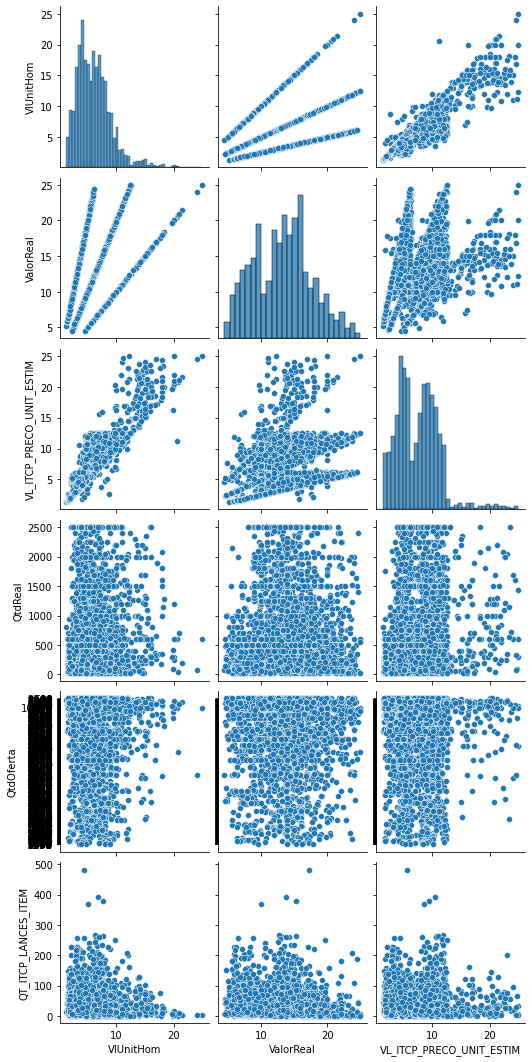

In [ ]:
#checando as correlações no dataset transformado de forma visual
sns.pairplot(df3,x_vars=['VlUnitHom','ValorReal','VL_ITCP_PRECO_UNIT_ESTIM'],
             y_vars=['VlUnitHom','ValorReal','VL_ITCP_PRECO_UNIT_ESTIM','QtdReal','QtdOferta','QT_ITCP_LANCES_ITEM']);

In [ ]:
#fazendo o join com a tabela de cotação de café
df4= df3.merge(cot_cafe,how='left', left_on=['UltLanMes','UltLanAno'], right_on=['Mês','Ano'])

In [ ]:
df4

,UltLanMes,UltLanAno,UnidPoder,UniEsfera,UnidUF,QT_ITCP_ITEM_COMPRAS,QT_ITCP_SOLICITADA,QT_ITCP_LANCES_ITEM,VL_ITCP_PROPOSTA_VENC_COMPRA,VL_ITCP_PRECO_UNIT_ESTIM,UNID_KG_REAL,QtdOferta,VlUnitHom,ValorReal,QtdReal,ValorEstimadoUnitReal,ValorPropostaReal,Data,Mês,Ano,Preco_Reais,Preco_Dolar,Unnamed: 5,Base2011_1_real,BaseMesAnterior
0,12.0,2020.0,Executivo,Federal,MG,1.0,500.0,8.0,5.80,5.85,0.25,500,5.8000,23.20,125.0,23.40,23.20,dez/20,12.0,2020.0,"594,33",115.62,NaN,1.371510,1.304911
1,4.0,2020.0,Executivo,Federal,PR,1.0,2200.0,37.0,7.00,7.78,0.50,2200,6.4772,12.95,1100.0,15.56,14.00,abr/20,4.0,2020.0,"584,56",109.76,NaN,1.348964,1.283703
2,3.0,2020.0,Executivo,Federal,MG,1.0,2450.0,15.0,6.00,9.47,0.50,2450,6.0000,12.00,1225.0,18.94,12.00,mar/20,3.0,2020.0,"556,28",113.73,NaN,1.283703,1.112083
3,8.0,2021.0,Executivo,Federal,SE,1.0,8988.0,33.0,6.20,5.72,0.25,8988,5.5485,22.19,2247.0,22.88,24.80,ago/21,8.0,2021.0,"1.033,92",196.96,NaN,2.385933,2.110444
4,10.0,2020.0,Executivo,Federal,PB,1.0,80.0,1.0,7.00,11.02,0.50,80,7.0000,14.00,40.0,22.04,14.00,out/20,10.0,2020.0,"536,6",95.33,NaN,1.238289,1.302949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306,10.0,2019.0,Executivo,Federal,SC,1.0,800.0,57.0,9.46,9.46,0.50,800,6.7000,13.40,400.0,18.92,18.92,out/19,10.0,2019.0,"421,59",103.26,NaN,0.972885,0.993746
3307,6.0,2017.0,Executivo,Federal,PR,1.0,400.0,15.0,9.39,9.39,0.50,400,8.9000,17.80,200.0,18.78,18.78,jun/17,6.0,2017.0,"445,85",135.27,NaN,1.028869,1.051576
3308,1.0,2018.0,Executivo,Federal,RJ,1.0,1000.0,15.0,8.00,7.96,0.50,1000,7.9500,15.90,500.0,15.92,16.00,jan/18,1.0,2018.0,"446,42",139.10,NaN,1.030184,1.032353
3309,9.0,2017.0,Executivo,Federal,RJ,1.0,4000.0,72.0,9.52,9.52,0.50,4000,6.5000,13.00,2000.0,19.04,19.04,set/17,9.0,2017.0,"453,46",144.61,NaN,1.046430,1.058684


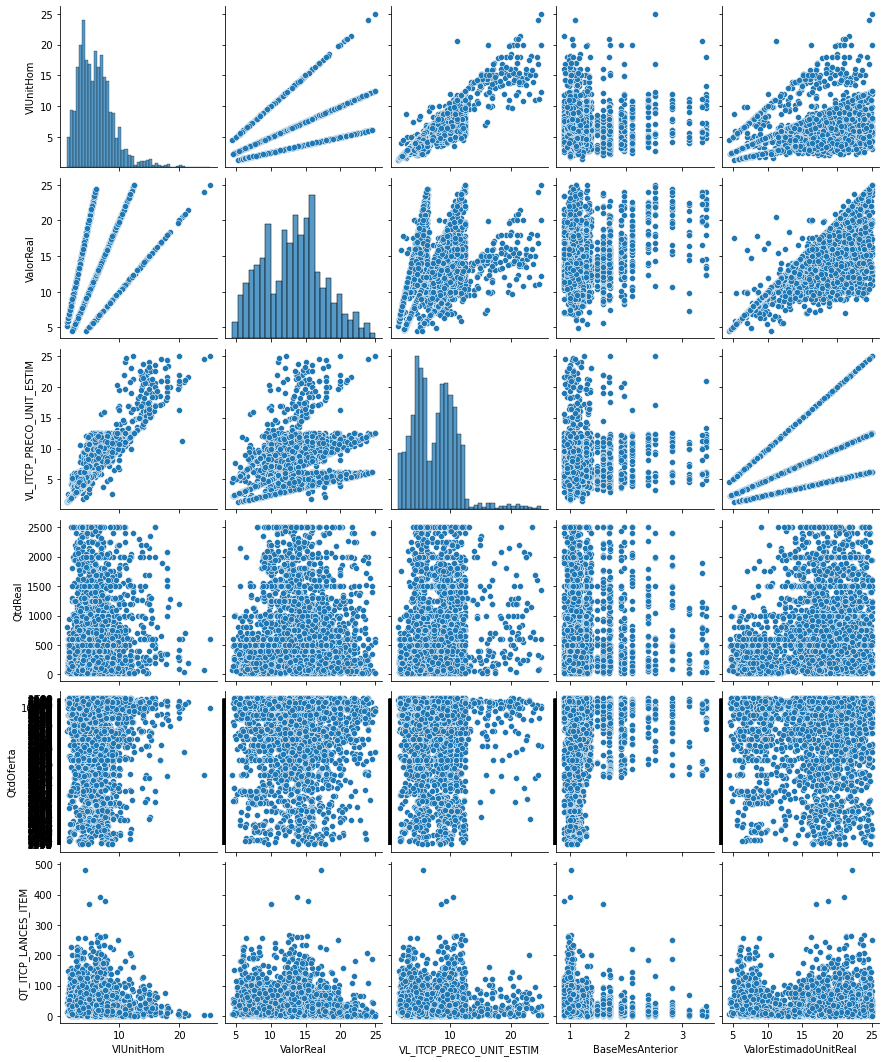

In [ ]:
#inserindo a nova variável na visualização
sns.pairplot(df4,x_vars=['VlUnitHom','ValorReal','VL_ITCP_PRECO_UNIT_ESTIM','BaseMesAnterior','ValorEstimadoUnitReal'],
             y_vars=['VlUnitHom','ValorReal','VL_ITCP_PRECO_UNIT_ESTIM','QtdReal','QtdOferta','QT_ITCP_LANCES_ITEM'])

In [ ]:
#filtrando as variáveis selecionadas para o modelo
df5 = df4[['UltLanMes', 'UltLanAno', 'UnidPoder', 'UniEsfera', 'UnidUF',
           'ValorEstimadoUnitReal','ValorReal']]

In [ ]:
#preparando as variáveis qualitativas para o modelo
df6=pd.get_dummies(df5, columns = ['UnidPoder',
       'UniEsfera','UnidUF'])

In [ ]:
#sem nulos
df6.isnull().sum()


UltLanMes                0
UltLanAno                0
ValorEstimadoUnitReal    0
ValorReal                0
UnidPoder_Executivo      0
UnidPoder_Judiciário     0
UnidPoder_Legislativo    0
UniEsfera_Estadual       0
UniEsfera_Federal        0
UniEsfera_Municipal      0
UnidUF_AC                0
UnidUF_AL                0
UnidUF_AM                0
UnidUF_AP                0
UnidUF_BA                0
UnidUF_CE                0
UnidUF_DF                0
UnidUF_ES                0
UnidUF_GO                0
UnidUF_MA                0
UnidUF_MG                0
UnidUF_MS                0
UnidUF_MT                0
UnidUF_PA                0
UnidUF_PB                0
UnidUF_PE                0
UnidUF_PI                0
UnidUF_PR                0
UnidUF_RJ                0
UnidUF_RN                0
UnidUF_RO                0
UnidUF_RR                0
UnidUF_RS                0
UnidUF_SC                0
UnidUF_SE                0
UnidUF_SP                0
UnidUF_TO                0
d

In [ ]:
#separando a variável target calculada a partir do Valor Unitário calculado e criando as variáveis x e y do modelo
y=df6['ValorReal'].values
X=df6.drop('ValorReal',axis=1).values

##Treinamento e Teste dos Modelos

In [ ]:
#separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

#Regressão Linear

In [ ]:
reg= LinearRegression()

In [ ]:
#fazendo o treinamento com todas as variáveis selecionadas
reg.fit(X_train,y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
#calculando o R2 e a raiz da média dos erros.
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6342152152624821
Root Mean Squared Error: 2.6517266049103574


In [ ]:
#treinando com as três primeiras colunas, guiado pelo featuring selection com a random forest abaixo.
reg.fit(X_train[:,0:3],y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test[:,0:3])

In [ ]:
#não houve melhoria no modelo com a diminuição das variáveis.
print("R^2: {}".format(reg.score(X_test[:,0:3], y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6281504371457547
Root Mean Squared Error: 2.673619285998337


In [ ]:
#média do erro de y considerando o valor médio do y de teste. Percebe-se que que existe um claro ganho na utlização do modelo com realção à média 
y_test_media = np.mean(y_test)
y_test_media = np.full((y_test.shape[0],1),y_test_media)
rmse_media = np.sqrt(mean_squared_error(y_test_media, y_test))
print("Root Mean Squared Error: {}".format(rmse_media))

Root Mean Squared Error: 4.3844581361400525


##Cross-Validation

In [ ]:
# Create a linear regression object: reg
reg2 = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg2, X_train,y_train,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 6.33774347e-01  6.24405928e-01 -1.65717111e+19  6.56982905e-01
  6.49707166e-01]
Average 5-Fold CV Score: -3.3143422295831864e+18


##Random Forest Regressor


In [ ]:
reg3 = RandomForestRegressor(n_estimators = 200, min_samples_leaf = 5, random_state = 42)

In [ ]:
arveres = reg3.fit(X_train, y_train)

In [ ]:
pred = arveres.predict(X_test)

In [ ]:
mean_squared_error(pred,y_test)

5.901077336834379

##Feature Engineering usando o Random Forest

In [ ]:
#checando a importância de cada variável para o modelo
importancia = reg3.feature_importances_

In [ ]:
pd_importancias= pd.Series(importancia,index=df6.drop('ValorReal',axis=1).columns)

In [ ]:
pd_importancias

UltLanMes               0.05
UltLanAno               0.07
ValorEstimadoUnitReal   0.84
UnidPoder_Executivo     0.00
UnidPoder_Judiciário    0.00
UnidPoder_Legislativo   0.00
UniEsfera_Estadual      0.00
UniEsfera_Federal       0.00
UniEsfera_Municipal     0.00
UnidUF_AC               0.00
UnidUF_AL               0.00
UnidUF_AM               0.00
UnidUF_AP               0.00
UnidUF_BA               0.00
UnidUF_CE               0.00
UnidUF_DF               0.00
UnidUF_ES               0.00
UnidUF_GO               0.00
UnidUF_MA               0.00
UnidUF_MG               0.00
UnidUF_MS               0.00
UnidUF_MT               0.00
UnidUF_PA               0.00
UnidUF_PB               0.00
UnidUF_PE               0.00
UnidUF_PI               0.00
UnidUF_PR               0.00
UnidUF_RJ               0.00
UnidUF_RN               0.00
UnidUF_RO               0.00
UnidUF_RR               0.00
UnidUF_RS               0.00
UnidUF_SC               0.00
UnidUF_SE               0.00
UnidUF_SP     

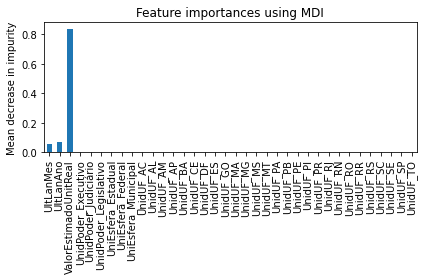

In [ ]:
#visualizando graficamente
fig, ax = plt.subplots()
pd_importancias.plot.bar(yerr=np.std([reg3.feature_importances_ for tree in reg3.estimators_], axis=0), ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

##Decision Tree Regressor

In [ ]:
reg4 = tree.DecisionTreeRegressor(max_depth=5)

In [ ]:
reg4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
pred2 = reg4.predict(X_test)

In [ ]:
mean_squared_error(pred2,y_test)

6.651077185578342

##Random Forest Regressor com Grid Search

In [ ]:
#criando o espaço dos hiperparâmetros
np.random.seed(42)
leafs = np.linspace(2,10,10,dtype='int')

In [ ]:
#criando um dicionário dos hiperparâmetros
param_grid = {'min_samples_leaf':leafs}

In [ ]:
reg5 = RandomForestRegressor(n_estimators = 200,random_state = 42)

In [ ]:
reg5_gs = GridSearchCV(reg5, param_grid, cv=5)

In [ ]:
reg5_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=200, random_state=42),
             param_grid={'min_samples_leaf': array([ 2,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [ ]:
print("Tuned Random Forest Parameters: {}".format(reg5_gs.best_params_)) 
print("Best score is {}".format(reg5_gs.best_score_))

Tuned Random Forest Parameters: {'min_samples_leaf': 2}
Best score is 0.6939811956651432


##AutoML simples

In [ ]:
!pip install lazypredict

     |████████████████████████████████| 1.2 MB 24.2 MB/s 
     |████████████████████████████████| 127.6 MB 21 kB/s 
     |████████████████████████████████| 302 kB 52.5 MB/s 
     |████████████████████████████████| 72 kB 947 kB/s 
     |████████████████████████████████| 6.8 MB 37.1 MB/s 
     |████████████████████████████████| 248 kB 52.0 MB/s 
     |████████████████████████████████| 10.1 MB 39.3 MB/s 
     |████████████████████████████████| 269 kB 45.9 MB/s 
     |████████████████████████████████| 25.9 MB 73.5 MB/s 
     |████████████████████████████████| 14.5 MB 56.9 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=e95a40b407f596899e426d526d33176f8c79a051345ac202bcd3e5239f6f0320
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#instanciando...
reg6 = LazyRegressor()

In [ ]:
#treinando...
models, predctions = reg6.fit(X_train, X_test,y_train,y_test)

100%|██████████| 42/42 [00:19<00:00,  2.19it/s]


In [ ]:
#Checando...
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.69,0.70,2.39,1.17
ExtraTreesRegressor,0.68,0.69,2.44,1.79
GradientBoostingRegressor,0.67,0.68,2.46,0.45
BaggingRegressor,0.67,0.68,2.47,0.22
LGBMRegressor,0.66,0.67,2.50,0.13
HistGradientBoostingRegressor,0.66,0.67,2.51,2.55
XGBRegressor,0.65,0.67,2.53,0.51
MLPRegressor,0.62,0.64,2.64,4.90
LassoCV,0.62,0.63,2.65,0.27
